### Validate the effect of primep1

we've seen the benefical effect of primep1 on increasing predict performance of uniform reservoir. we would like to double check its accuracy and explore its root.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report

from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

First, I would like to replicate previous experiment that run two reservoir continueously

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
interdensity: 100
restart: False
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.4999998889492148
p2: 0.5000001110507851


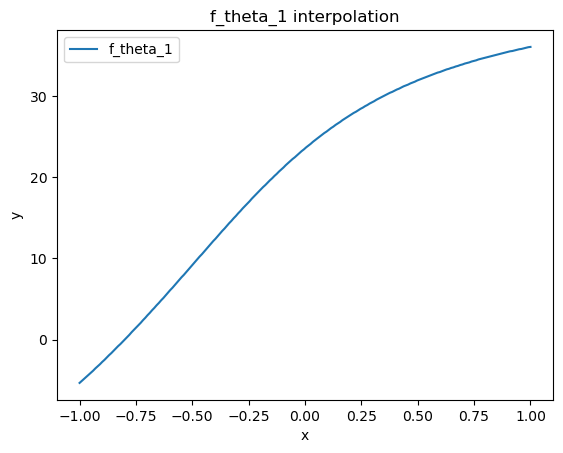

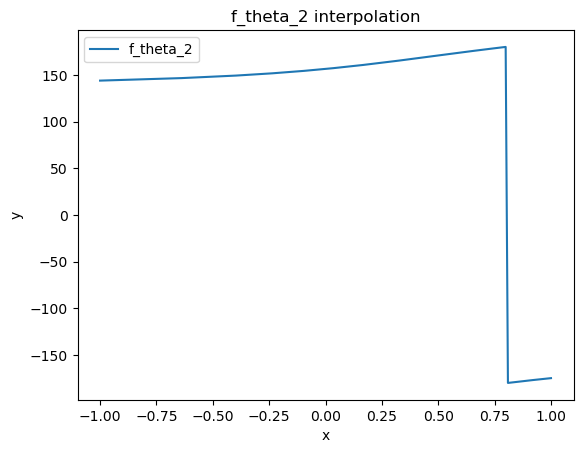

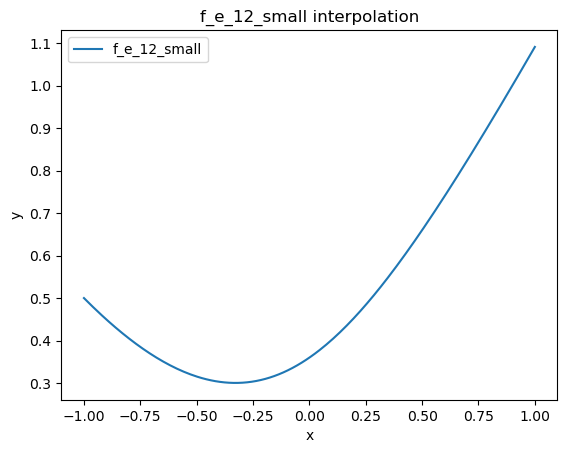

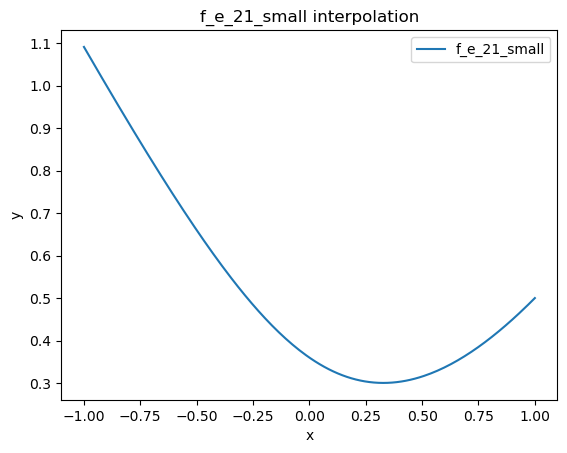

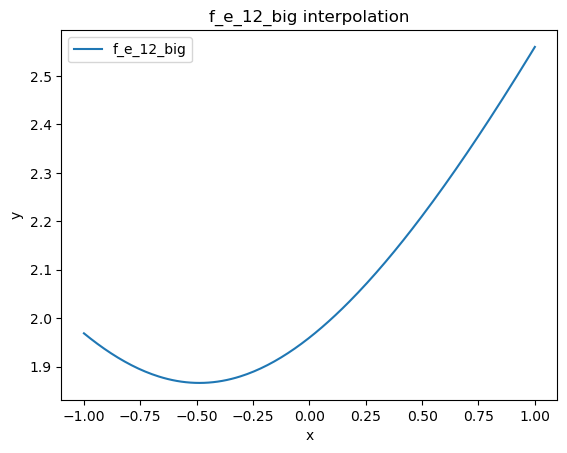

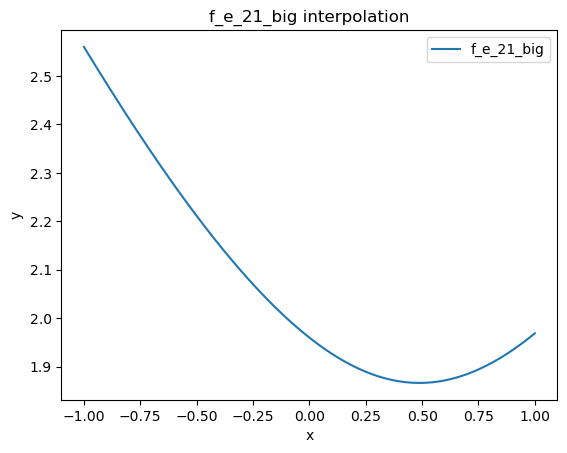

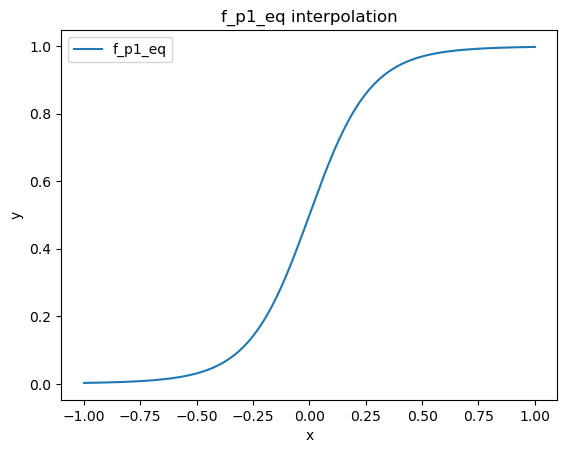

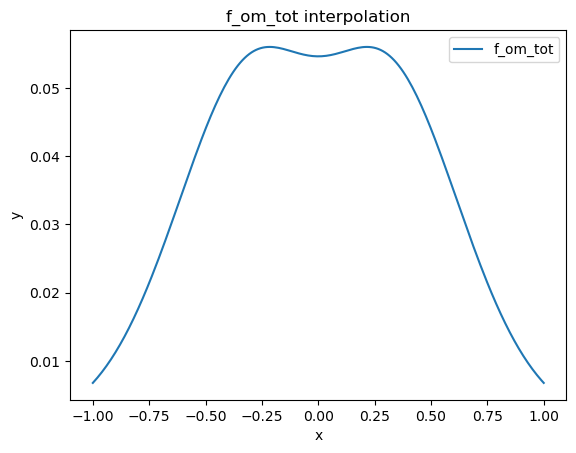

current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
skip restarting..
Seed Training: 1234
interdensity: 100
restart: False
Primep1: None
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00162681]
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50556854]
p2: shape: (1,)
  value: [0.49443146]


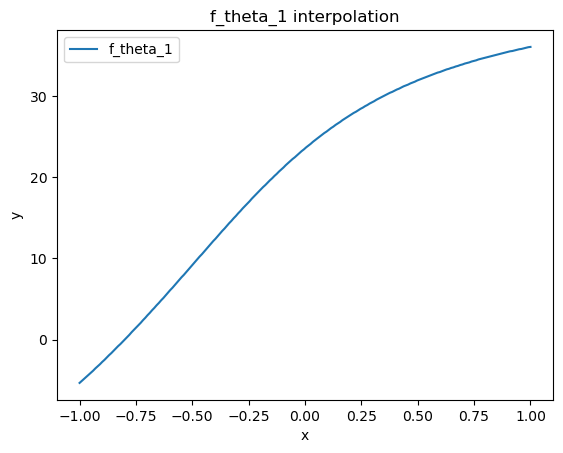

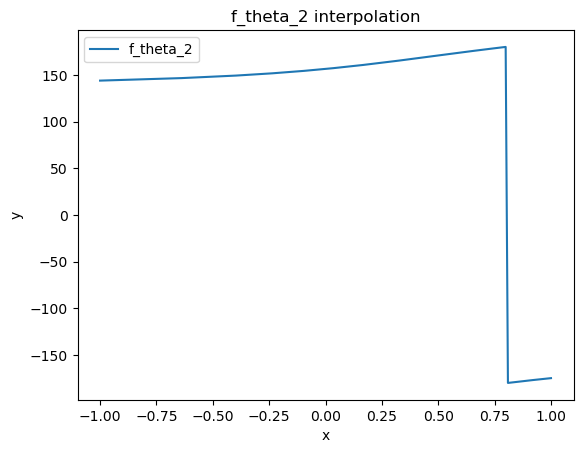

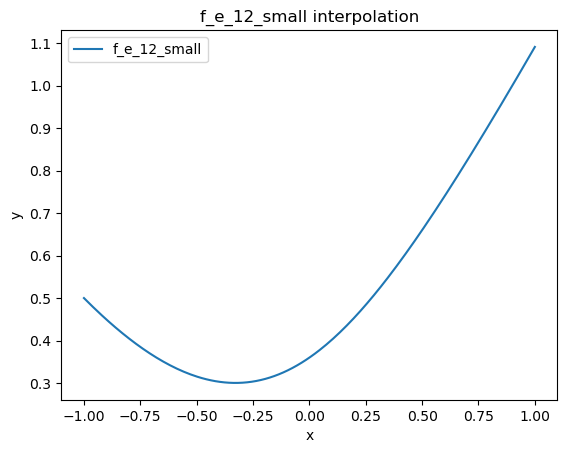

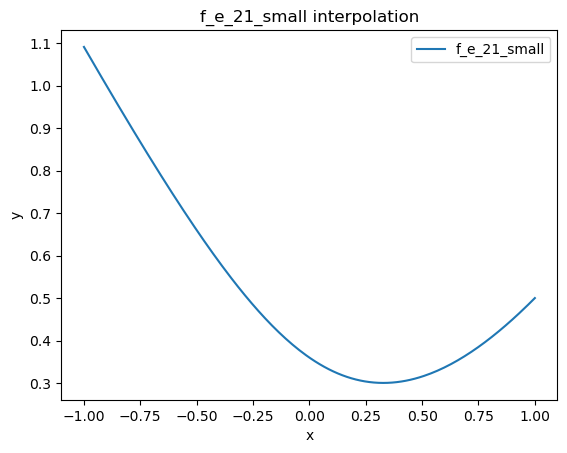

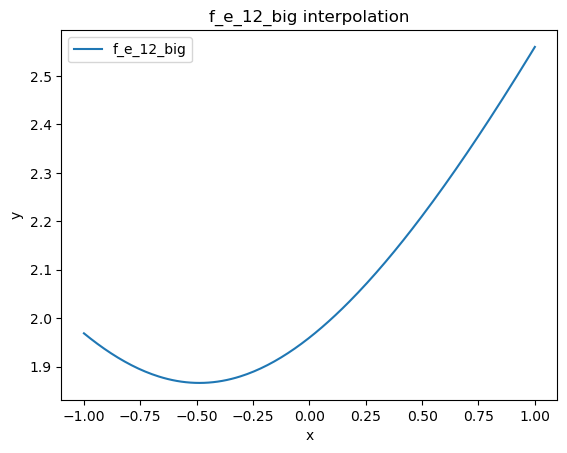

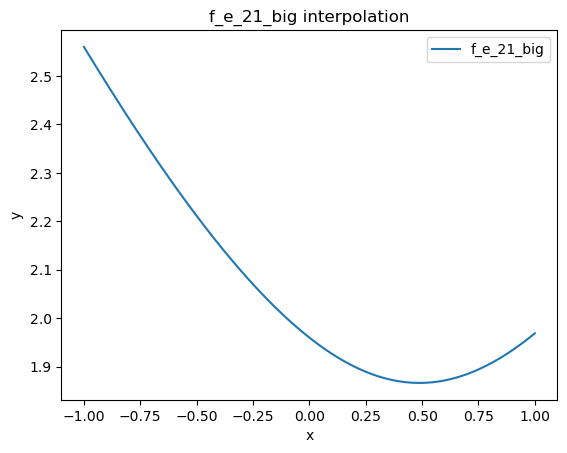

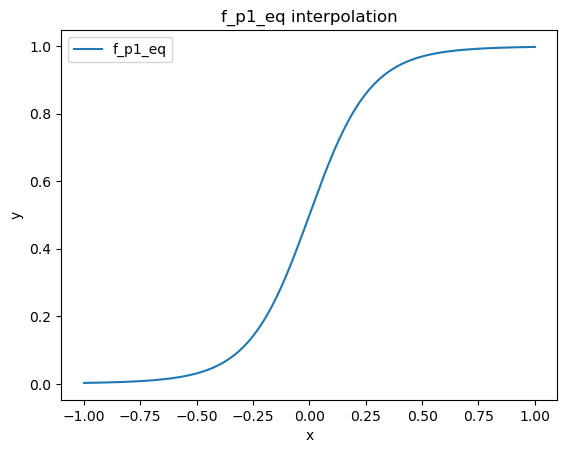

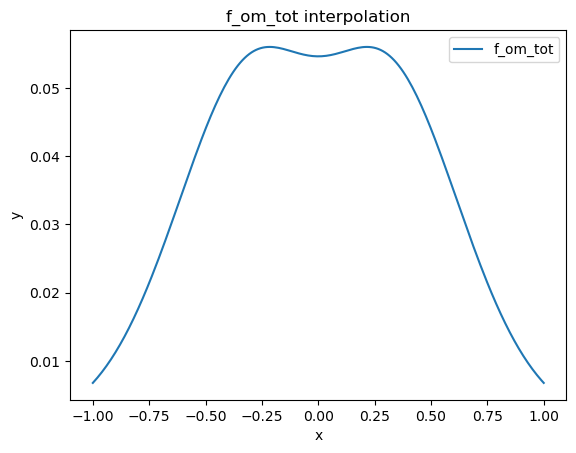

current phase: test
p1 in test & fast: [0.50556854]
noise-free testing output
skip restarting..
Spacer NRMSE:0
4.695368989894634 19.580141173099264


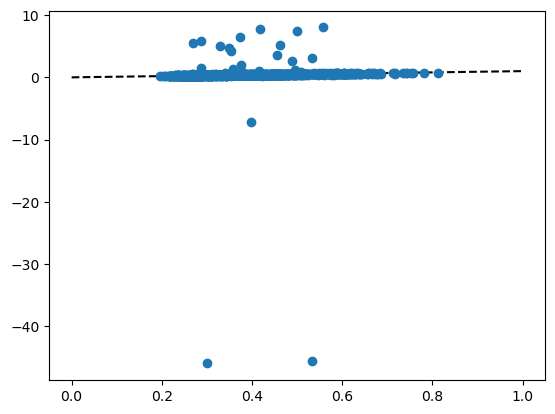

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
interdensity: 100
restart: False
Primep1: None
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00095219]
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50459066]
p2: shape: (1,)
  value: [0.49540934]


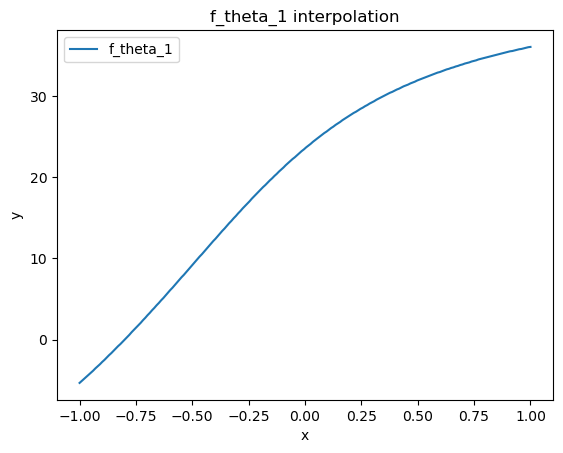

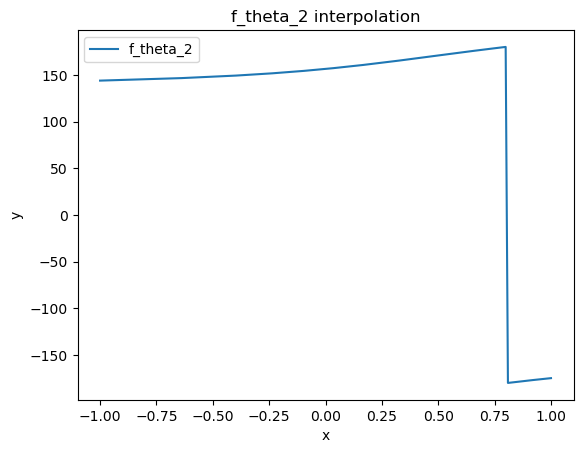

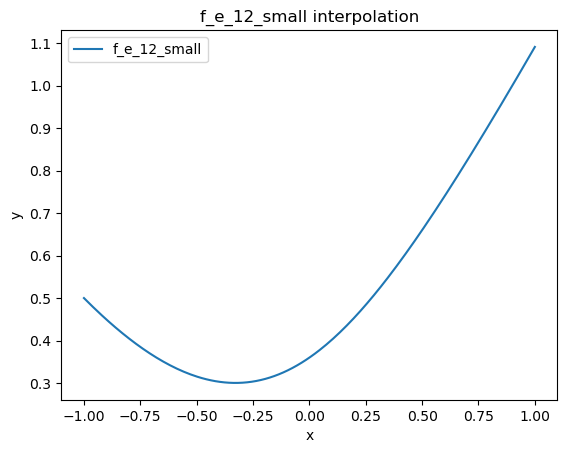

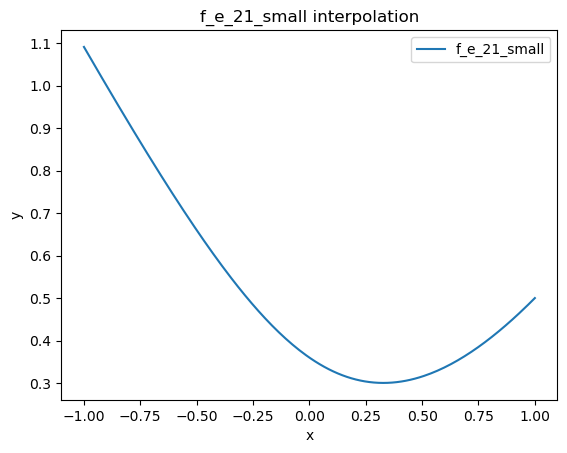

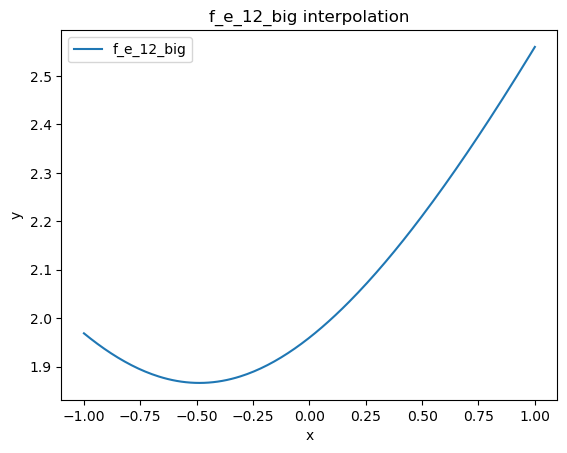

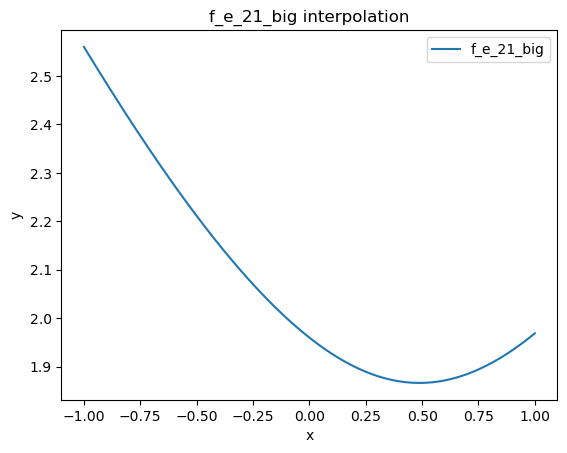

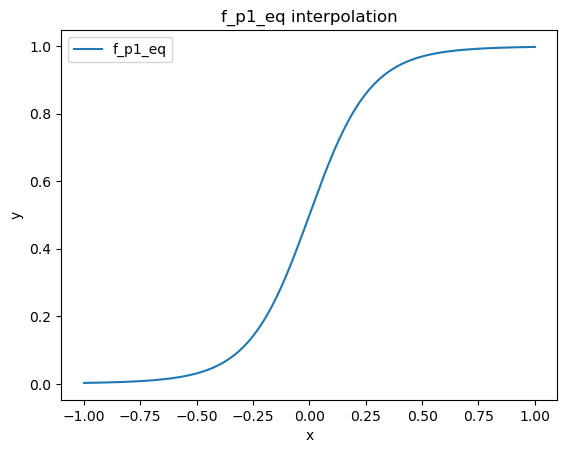

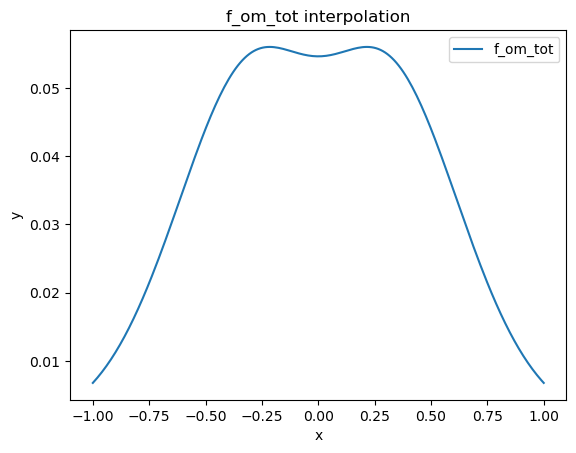

current phase: train
p1 in train & fast: [0.50459066]
noise-free training output
skip restarting..
Seed Training: 1234
interdensity: 100
restart: False
Primep1: None
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00162681]
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50556854]
p2: shape: (1,)
  value: [0.49443146]


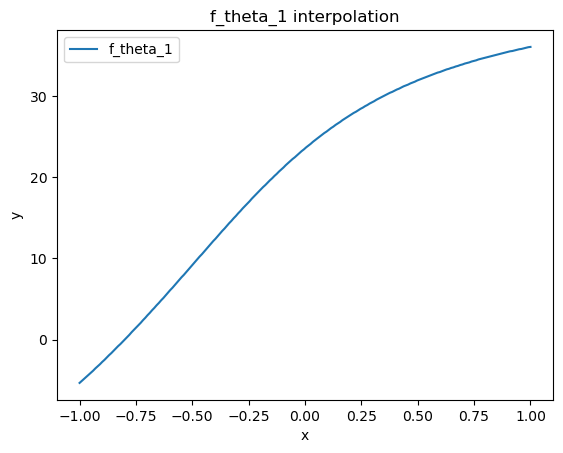

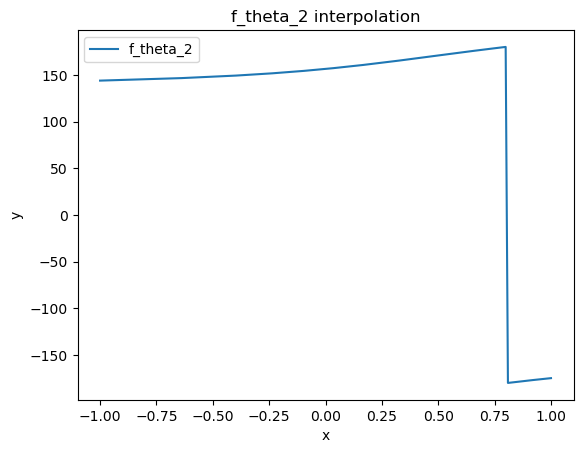

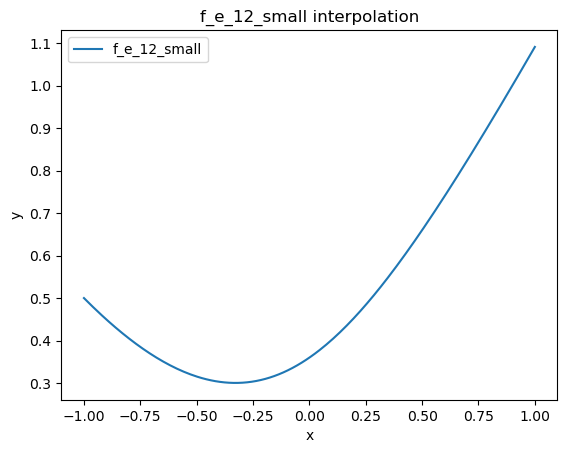

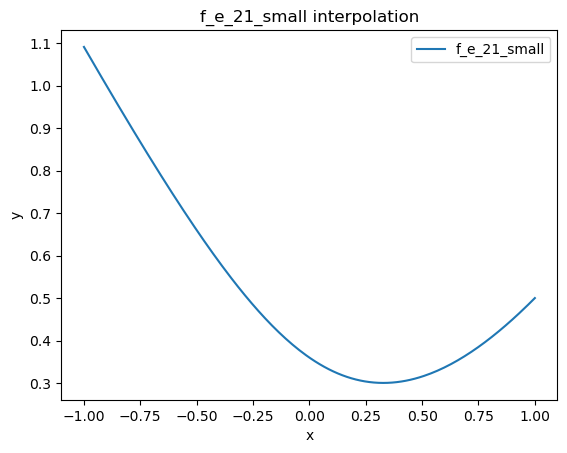

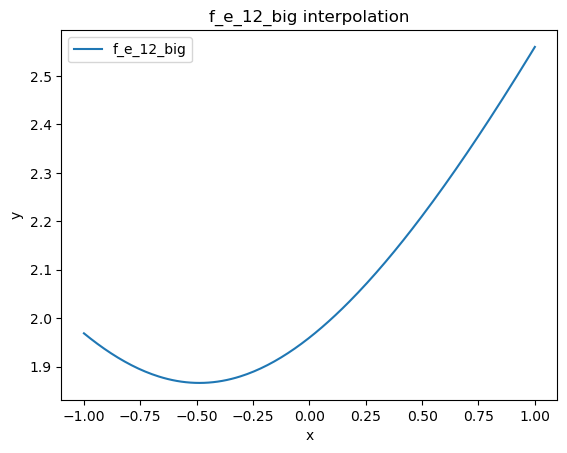

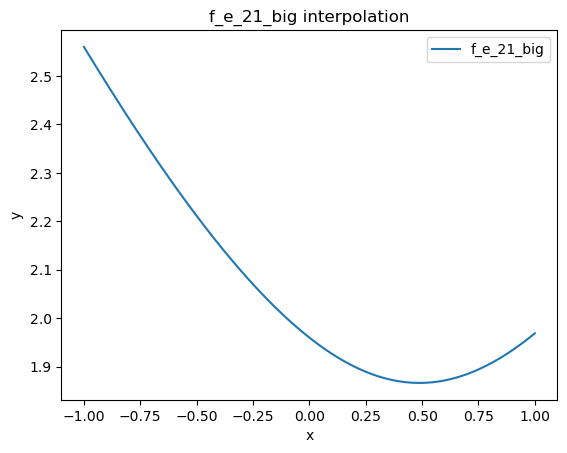

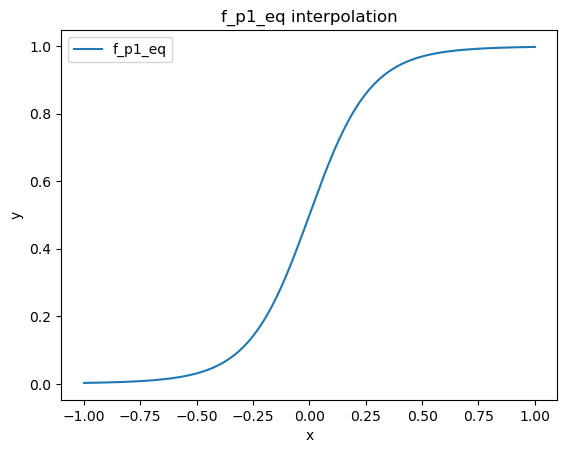

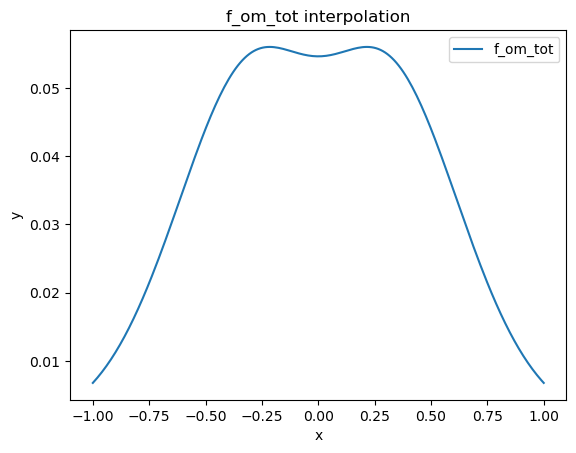

current phase: test
p1 in test & fast: [0.50556854]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004327425883623351 0.5944232313530956


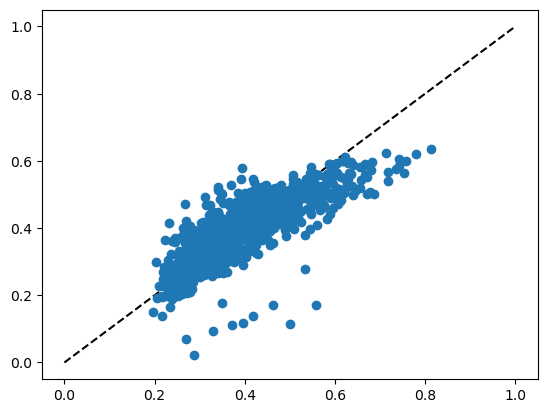

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn1 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)

transform1 = spn1.gen_signal_fast_delayed_feedback

# run
(y_test_1,y_pred_1) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform1,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_2,y_pred_2) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform1,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Second, validate difference between continue running and individual running

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
interdensity: 100
restart: False
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.4999998889492148
p2: 0.5000001110507851


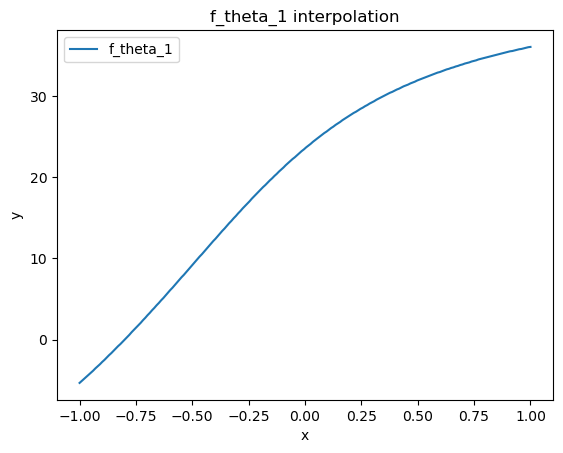

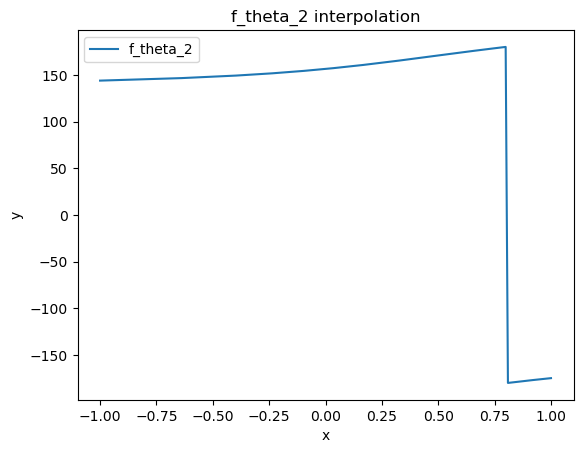

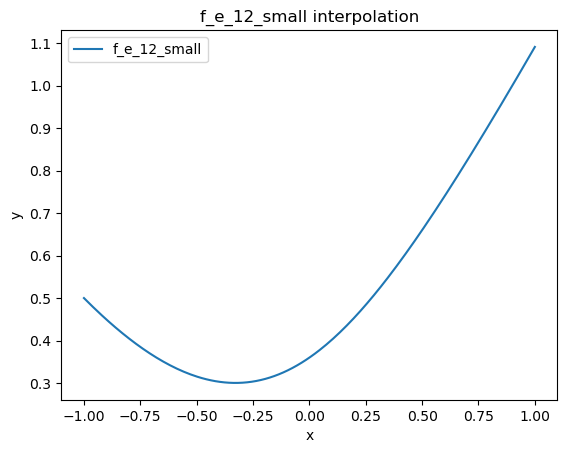

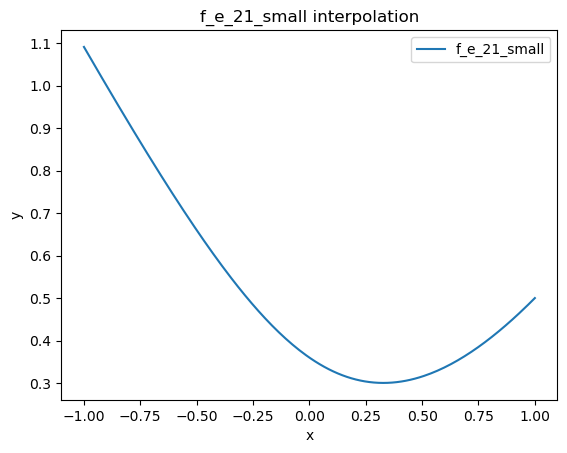

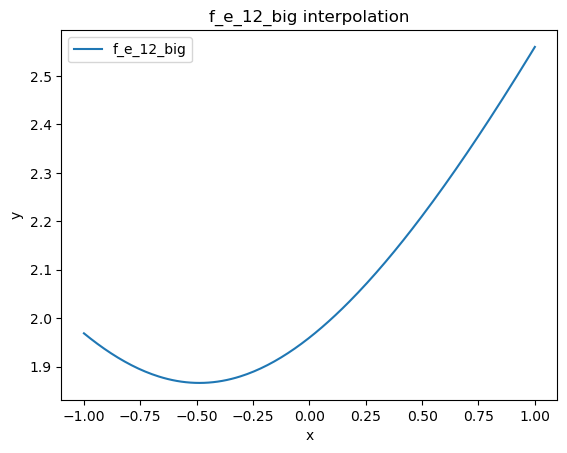

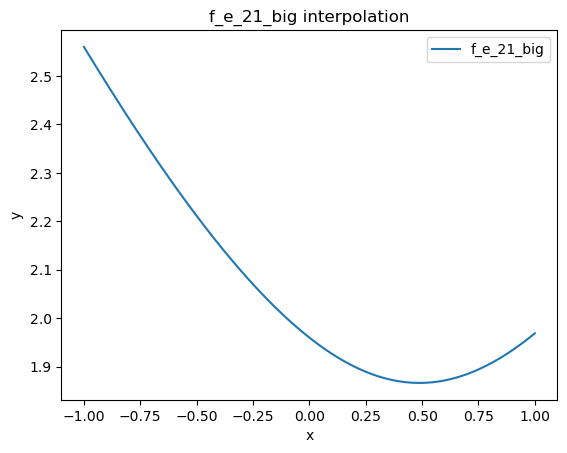

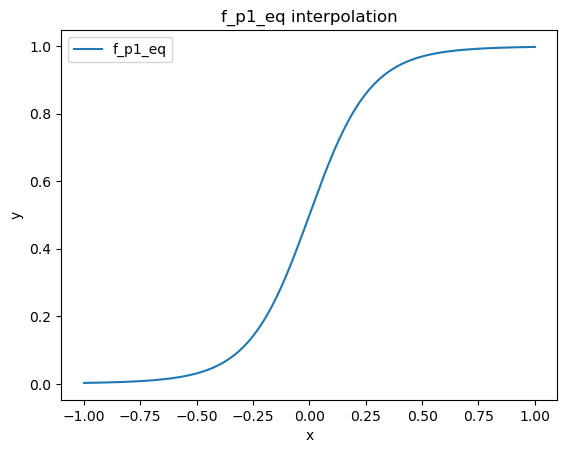

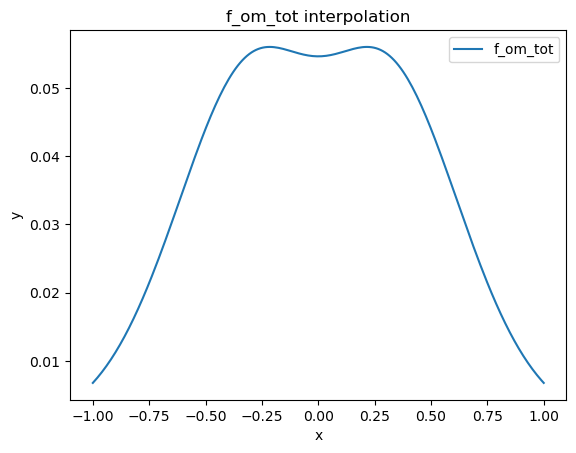

current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
skip restarting..
Seed Training: 1234
interdensity: 100
restart: False
Primep1: None
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00162681]
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50556854]
p2: shape: (1,)
  value: [0.49443146]


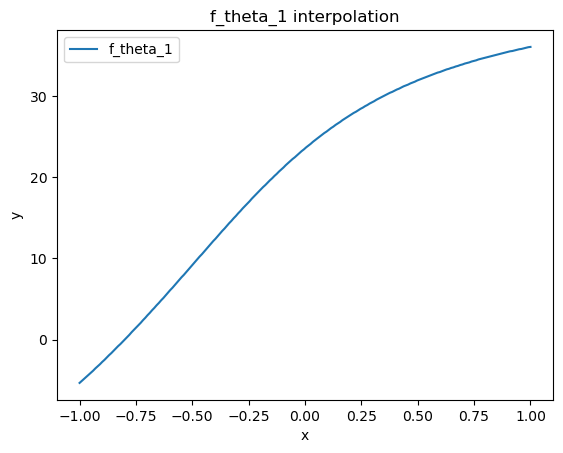

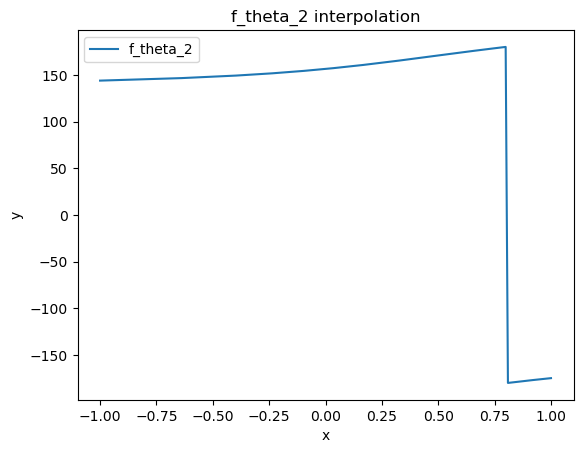

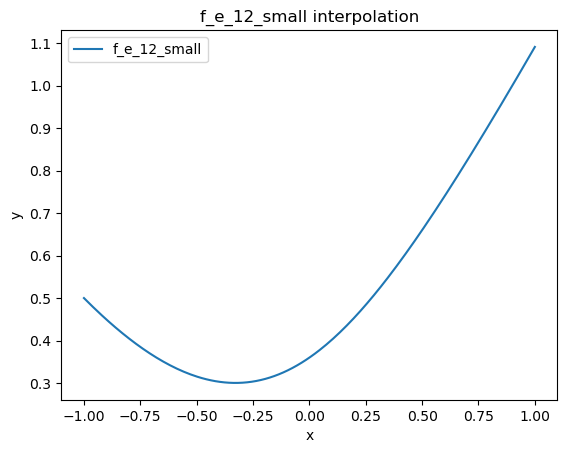

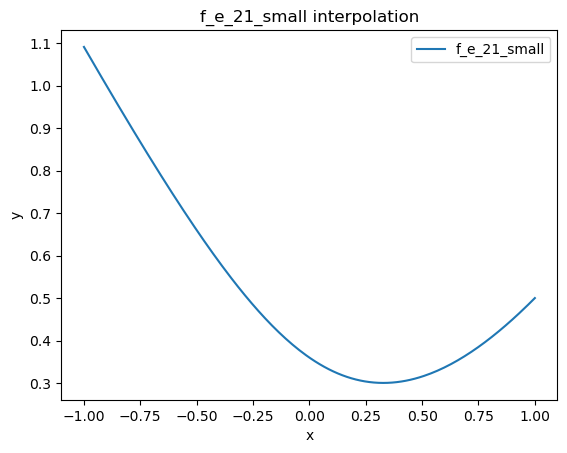

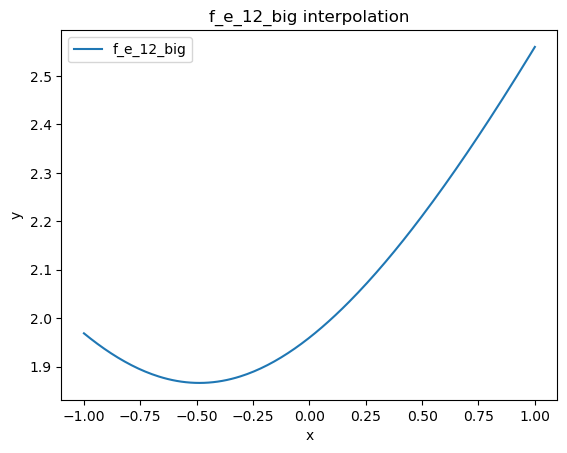

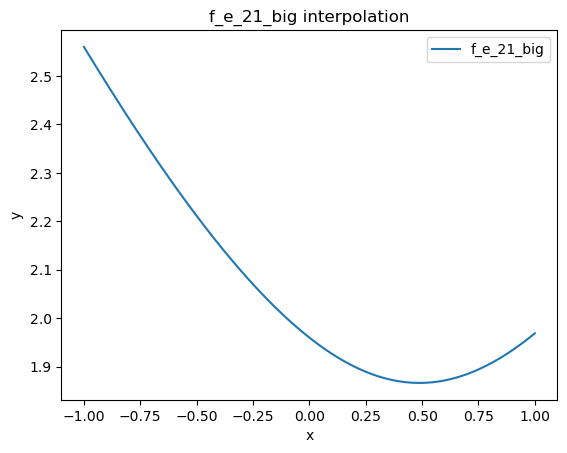

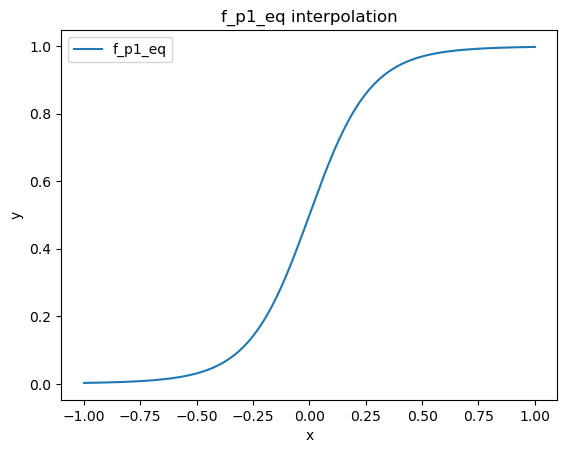

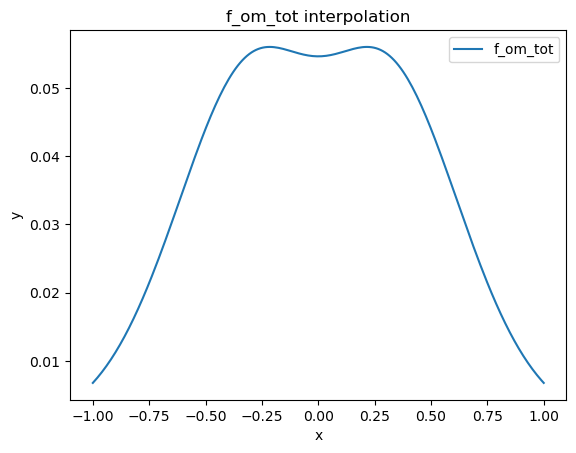

current phase: test
p1 in test & fast: [0.50556854]
noise-free testing output
skip restarting..
Spacer NRMSE:0
4.695368989894634 19.580141173099264


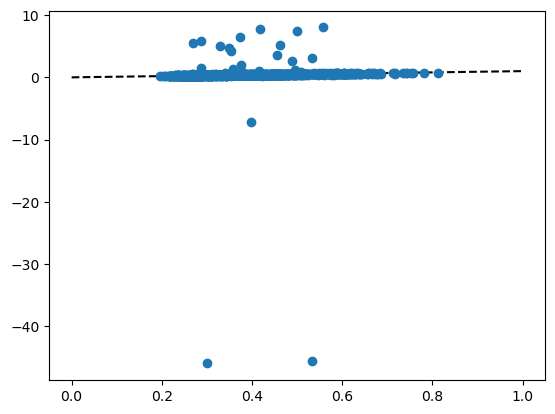

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn2 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)

transform2 = spn2.gen_signal_fast_delayed_feedback

# run
(y_test_2,y_pred_2) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform2,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)


Extract the initial p1 of the reservoir during the training phase in the second run of continuous runing. Assign this p1 to a new reservoir and see its NRMSE

its initial p1 in train phase is 0.50459066. Let us add it！

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.4999998889492148
p2: 0.5000001110507851


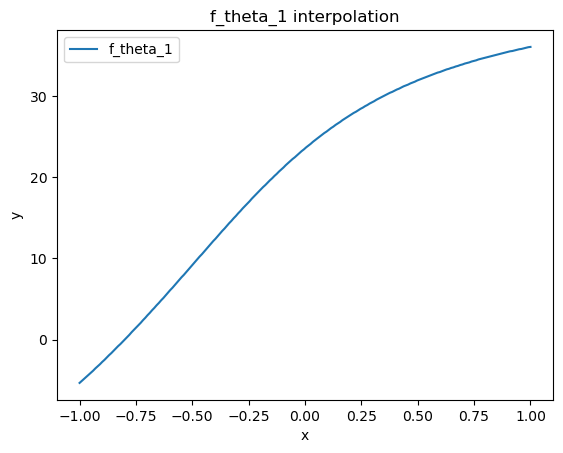

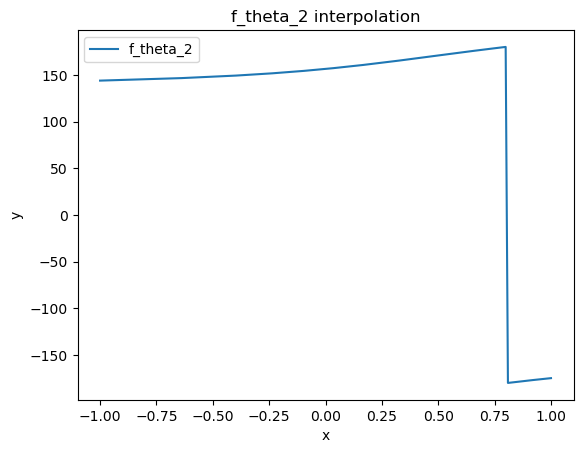

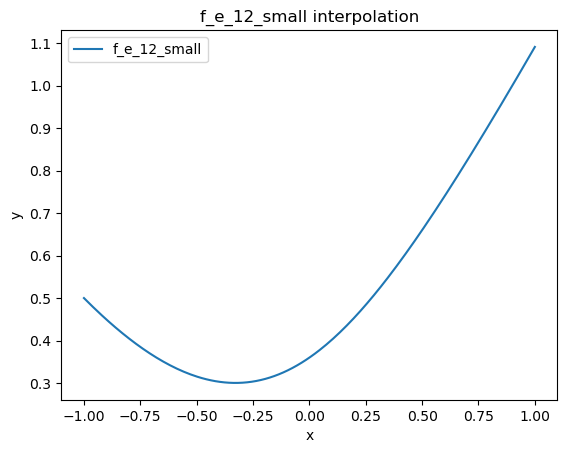

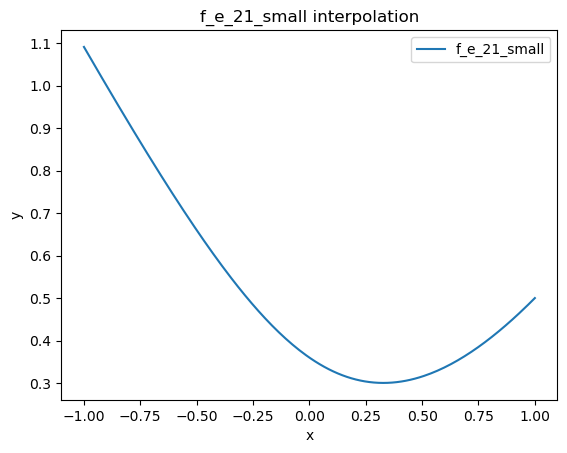

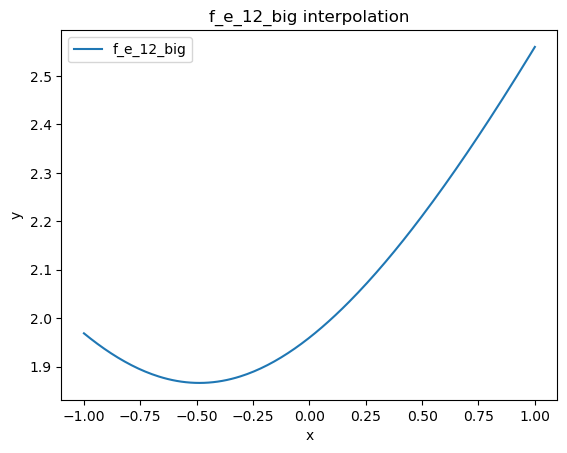

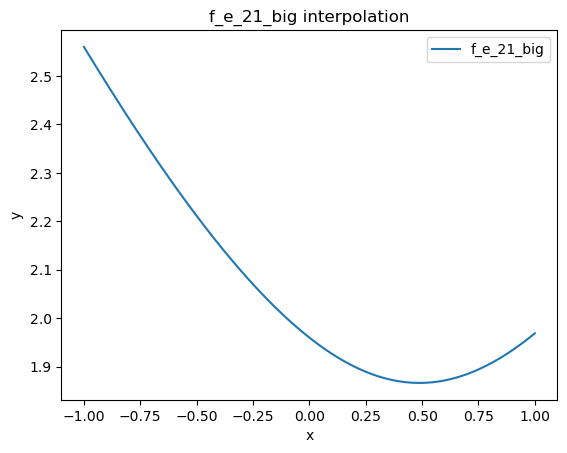

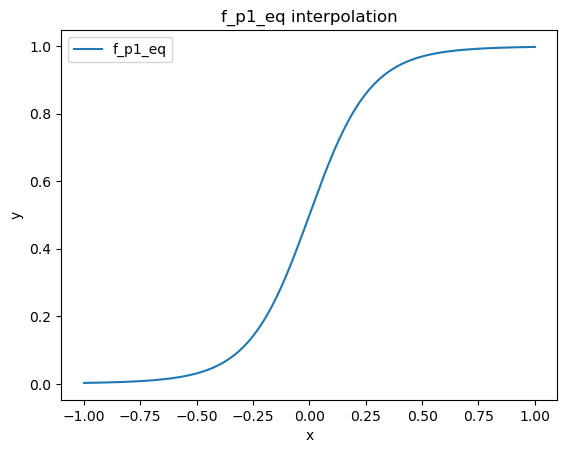

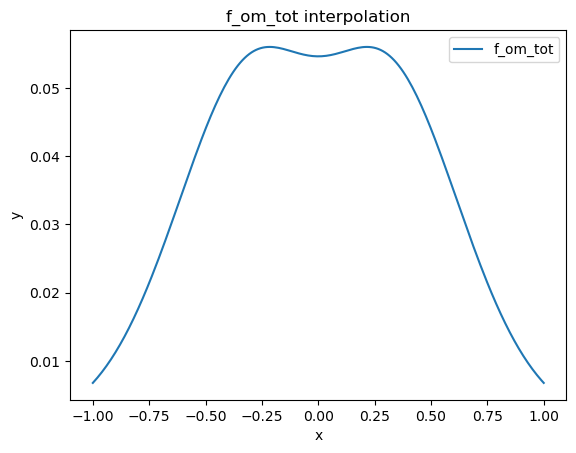

current phase: train
p1 in train & fast: 0.50459066
noise-free training output
skip restarting..
Seed Training: 1234
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00162681]
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50556854]
p2: shape: (1,)
  value: [0.49443146]


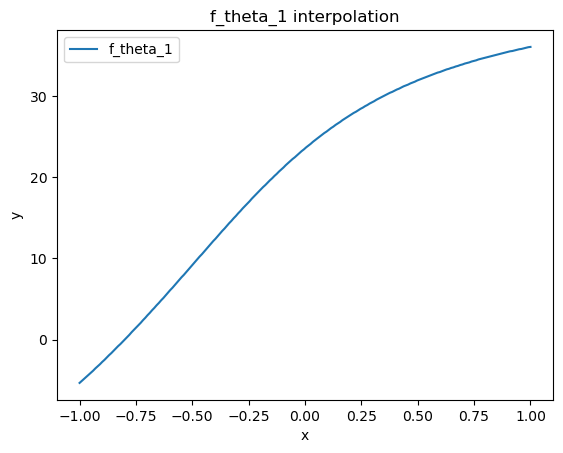

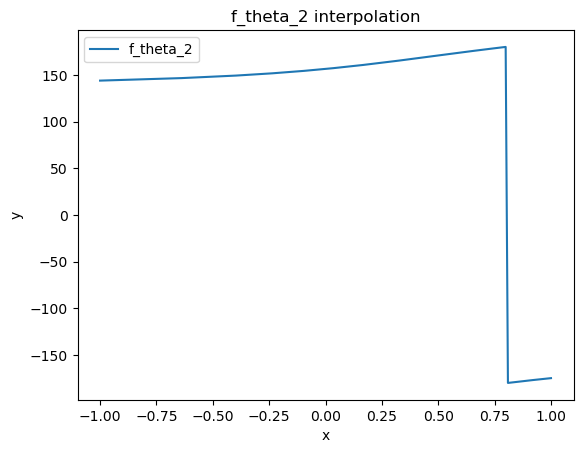

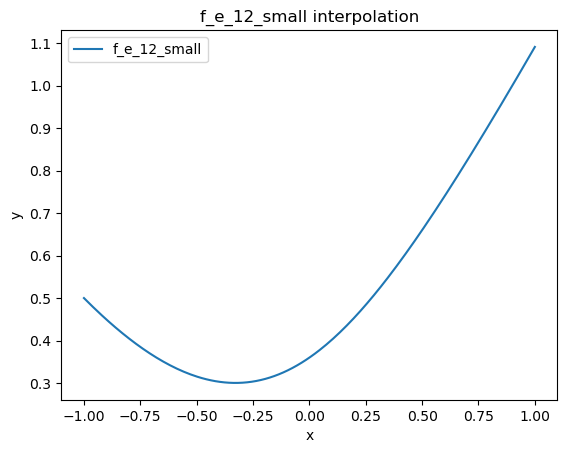

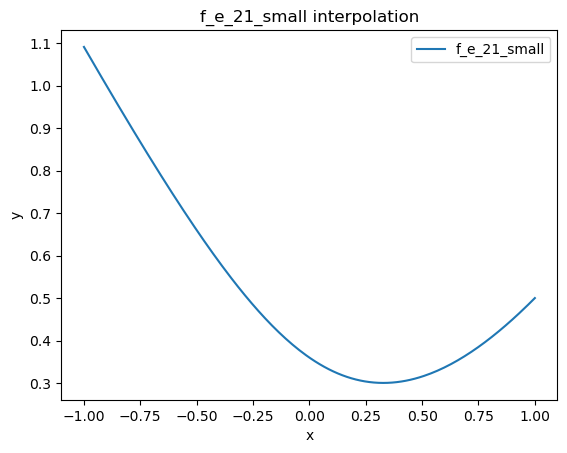

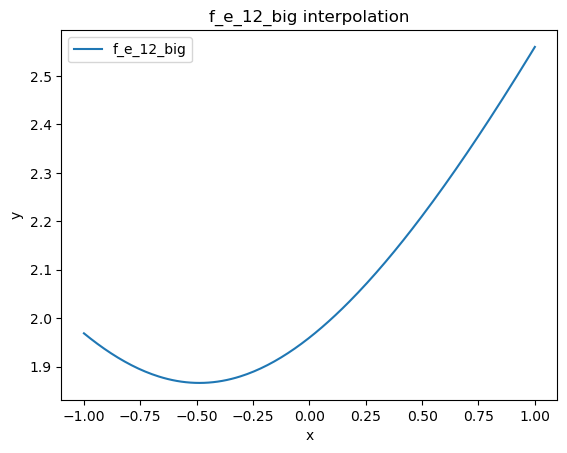

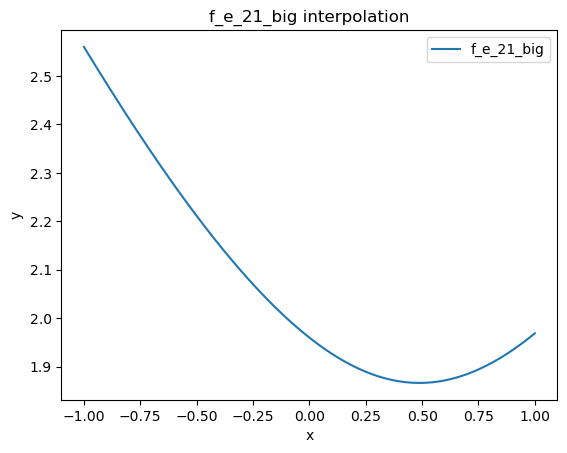

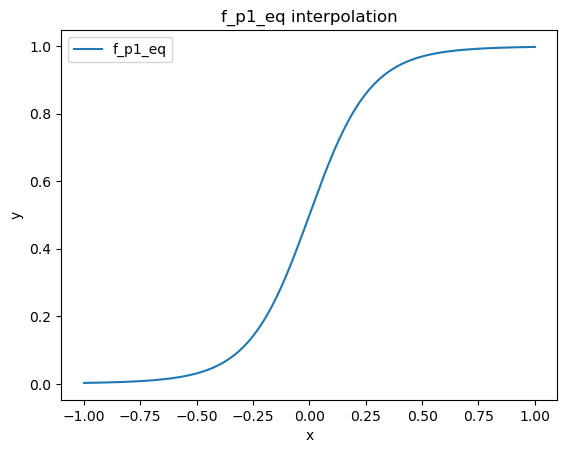

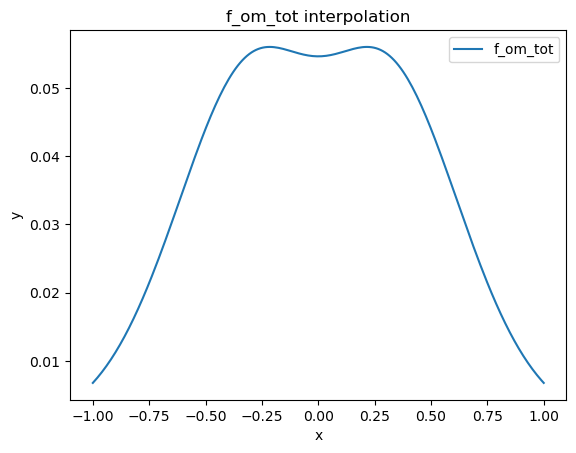

current phase: test
p1 in test & fast: [0.50556854]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004327425870672416 0.5944232304636135


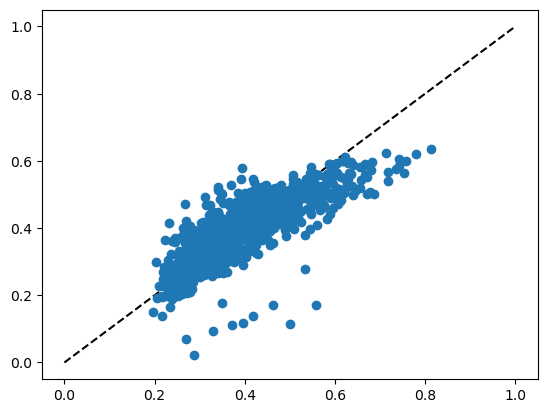

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn2 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=0.50459066)

transform2 = spn2.gen_signal_fast_delayed_feedback

# run
(y_test_2,y_pred_2) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform2,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

#### Comparison in NRMSE values across different running:  0.5944232313530956 (the second result from continuous running) and 0.5944232304636135 (the result from individual running)

we can see the primep1 is the most important factor that increasing the performance of the individual testing because of the close NRMSE

but there is a potential problem: we change the value of initial p1 in the transform function rather than __initi__. it means that the rest of parameter, apart from p1, kept their initial value. is that true in the real world?

i added a new print in the fast_transform method in order to print all parameters after changing of p1. let's compare the difference on parameters between initial state and state after changing p1

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.4999998889492148
p2: 0.5000001110507851
k_s_lim: 1.0
compute_interpolation: True


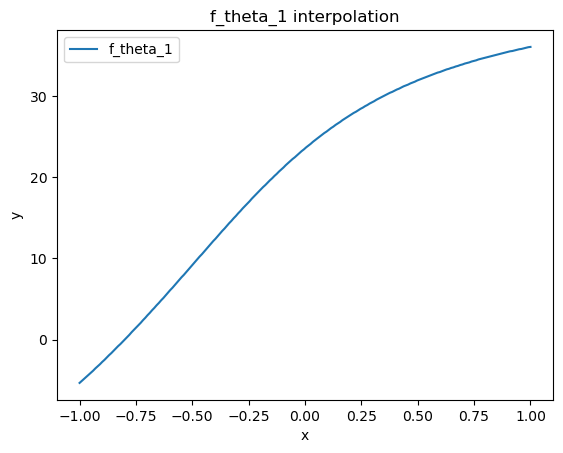

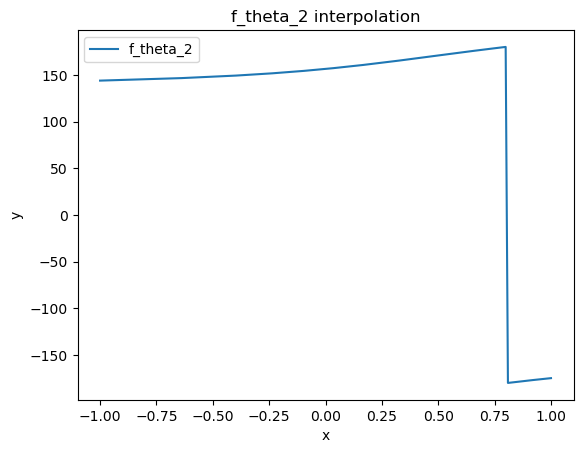

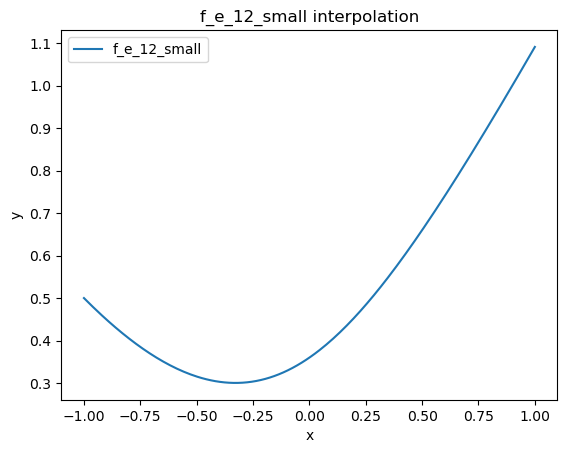

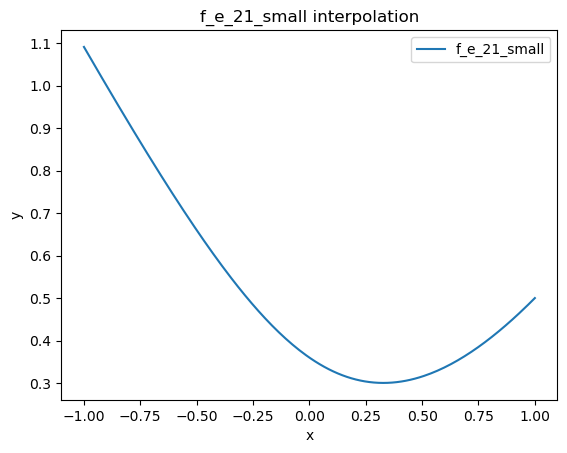

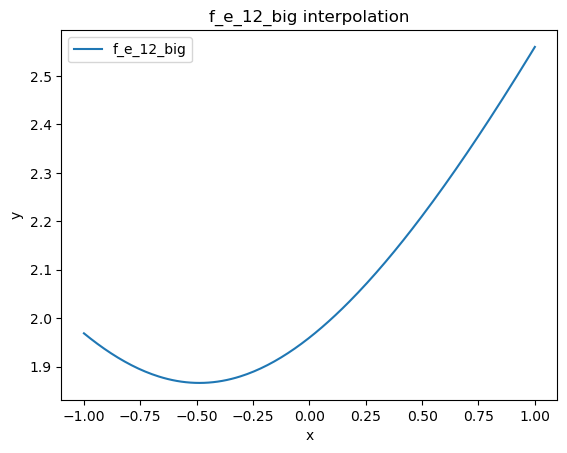

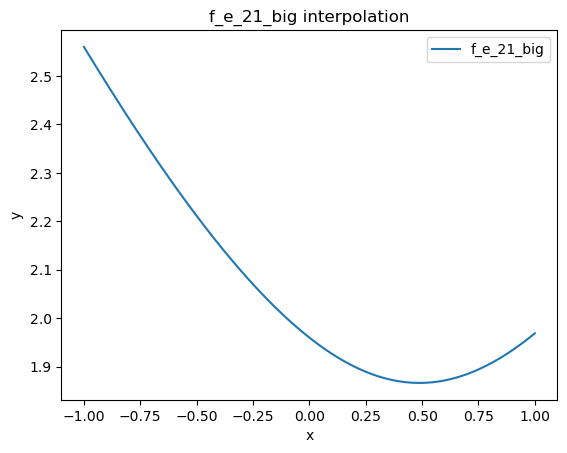

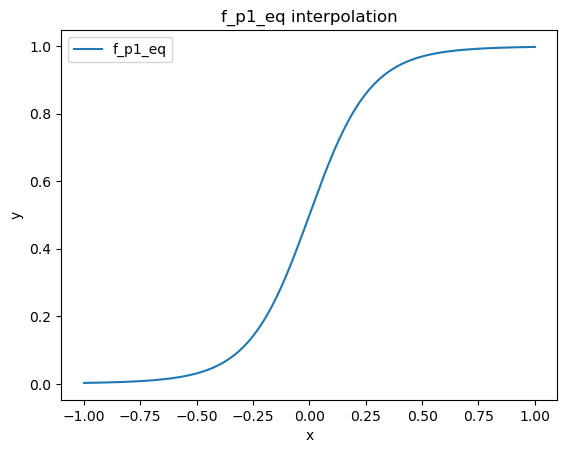

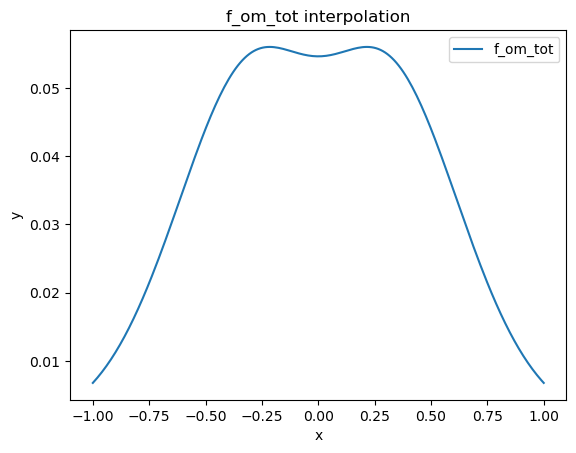

current phase: train
p1 in train & fast: 0.50459066
==================== parameters after changing p1 ====================
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.50459066
p2: 0.49540934000000003
k_s_lim: 1.0
compute_interpolation: True


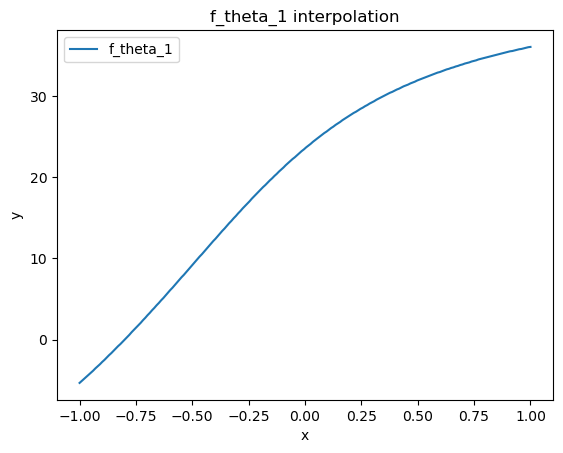

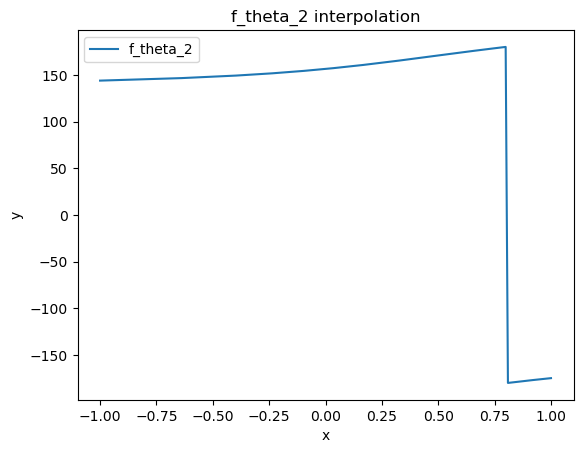

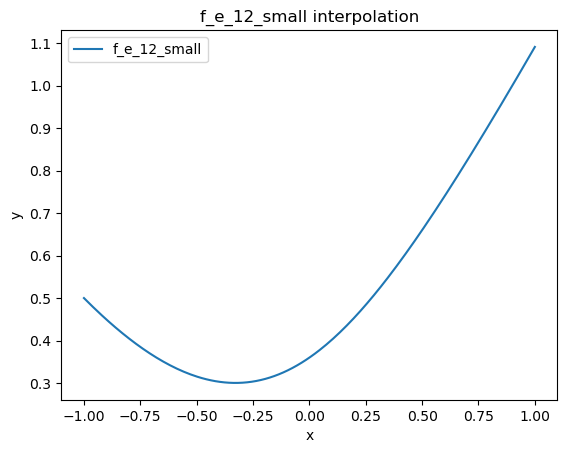

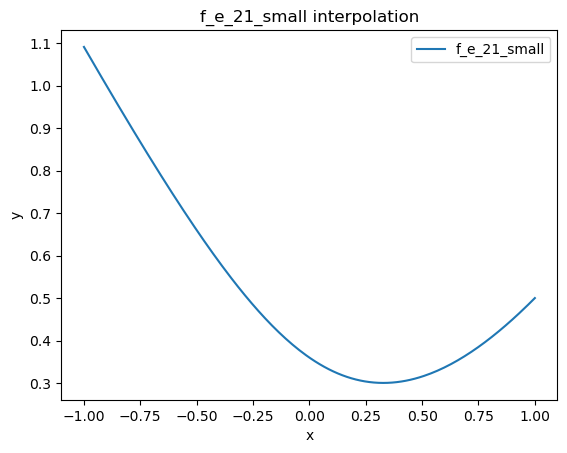

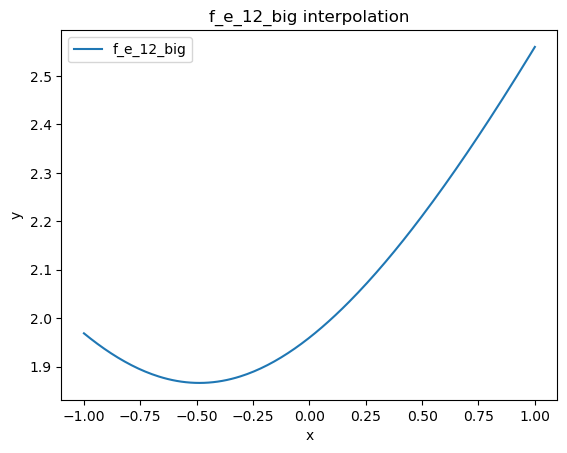

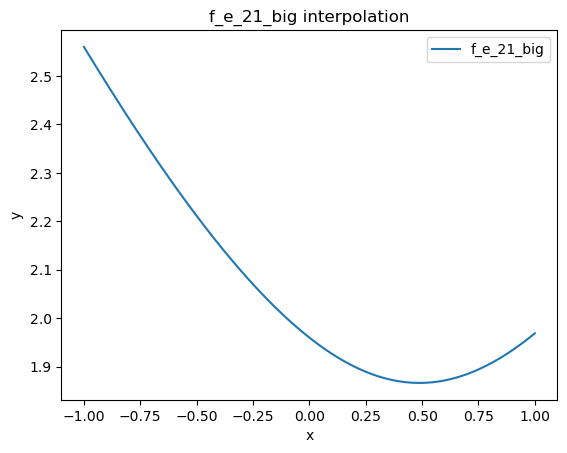

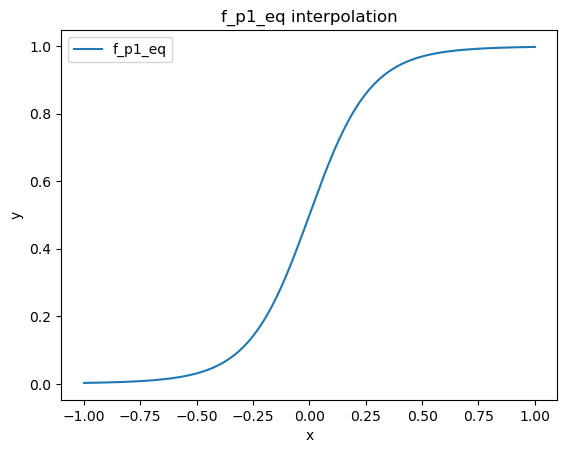

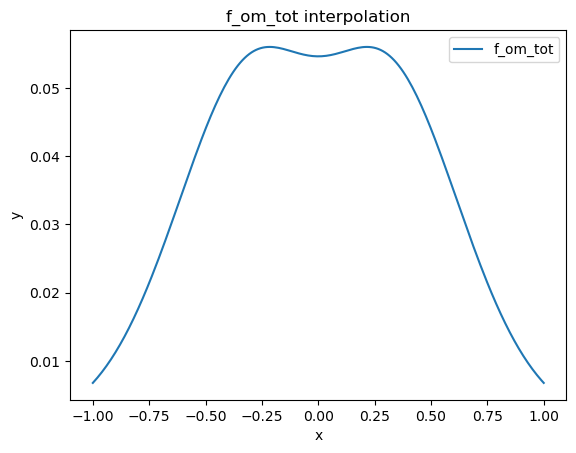

==================== parameters after changing p1 ====================
noise-free training output
skip restarting..
Seed Training: 1234
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00162681]
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50556854]
p2: shape: (1,)
  value: [0.49443146]
k_s_lim: 1.0
compute_interpolation: True


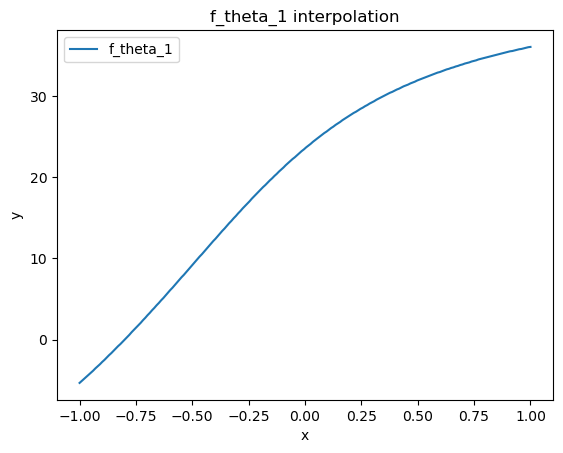

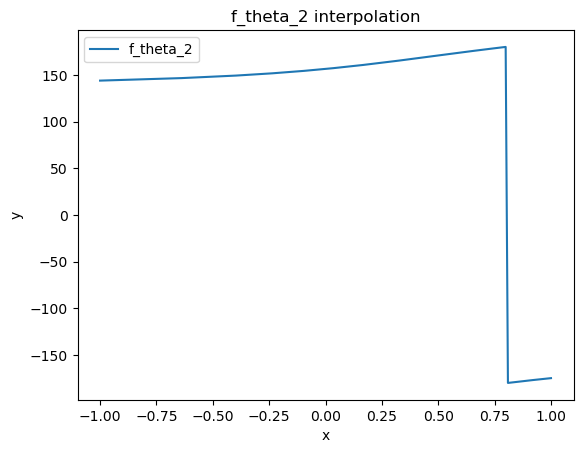

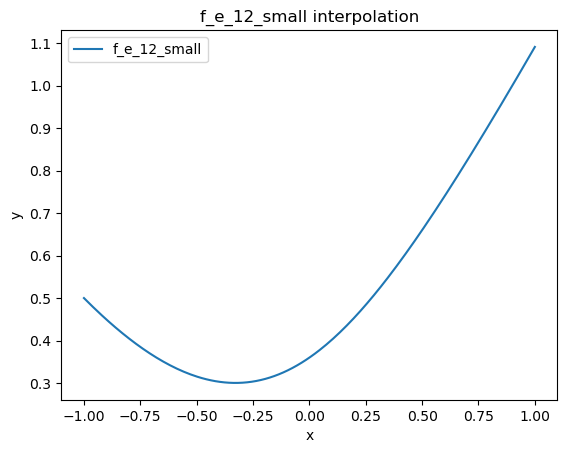

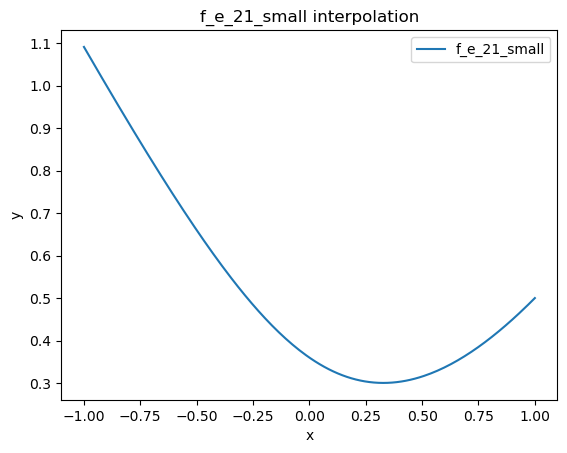

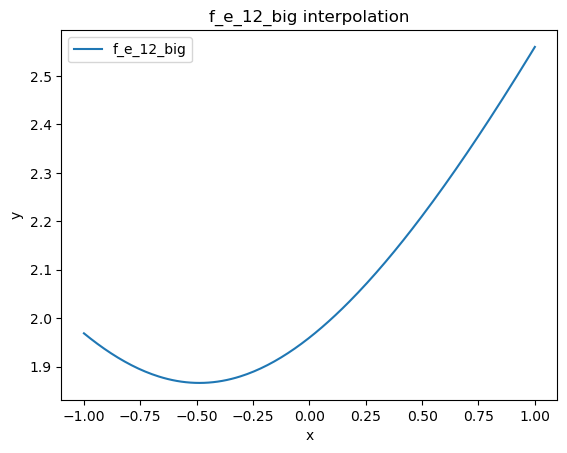

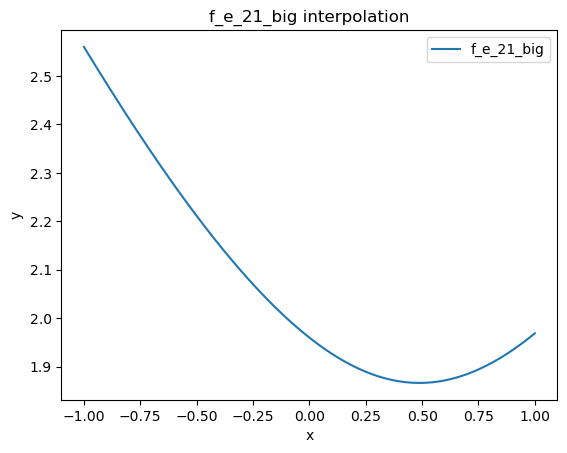

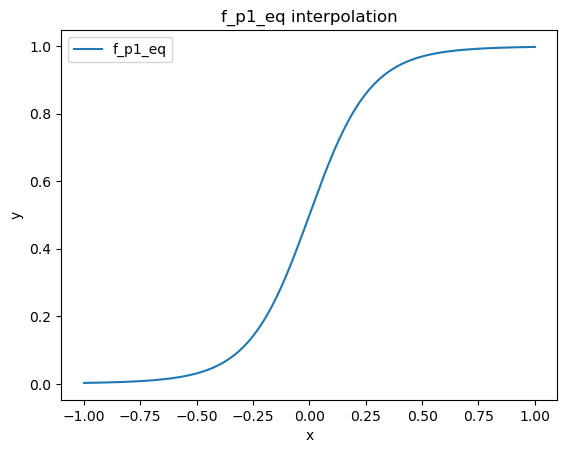

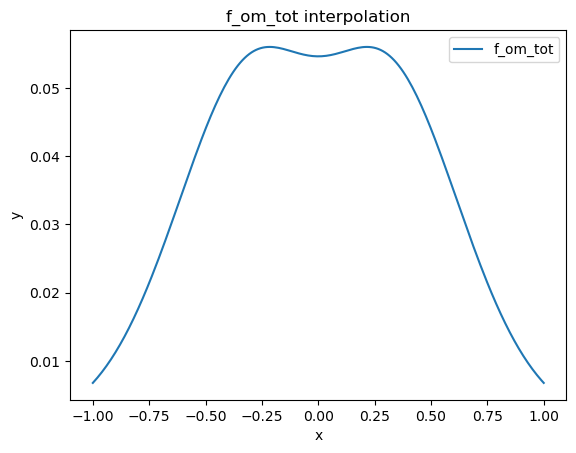

current phase: test
p1 in test & fast: [0.50556854]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004327425870672416 0.5944232304636135


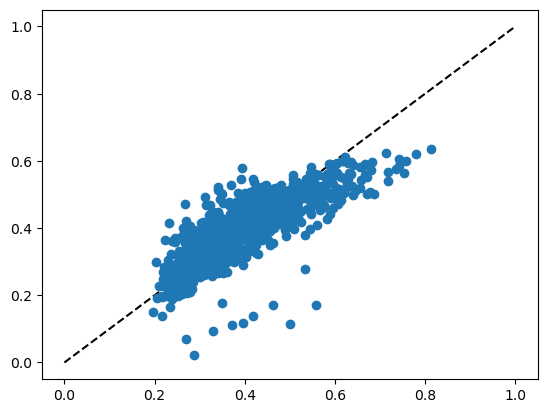

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn2 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=0.50459066)

transform2 = spn2.gen_signal_fast_delayed_feedback

# run
(y_test_2,y_pred_2) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform2,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Let's change the k_s too. change the value of k_s in transform as well and see its influence

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 10
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.4999998889492148
p2: 0.5000001110507851
k_s_lim: 1.0
compute_interpolation: True


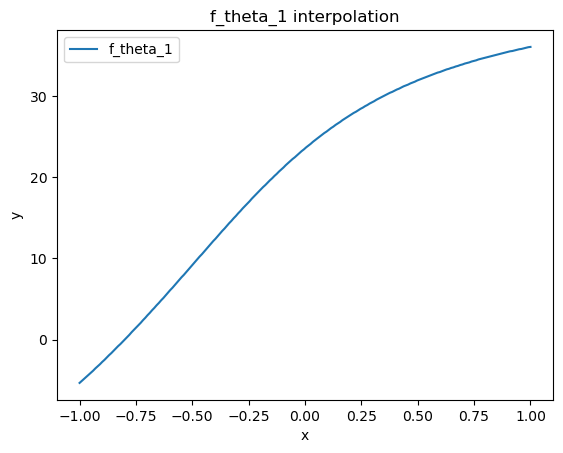

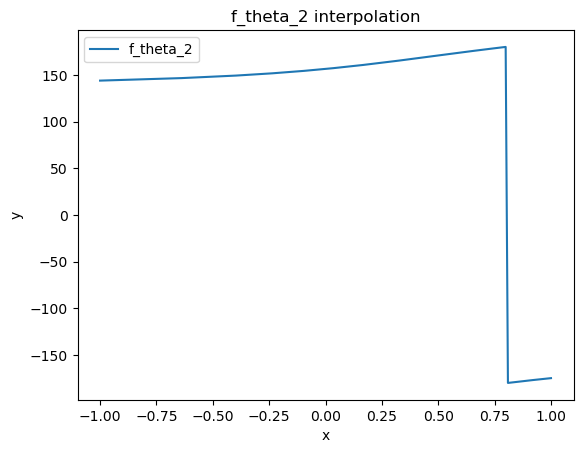

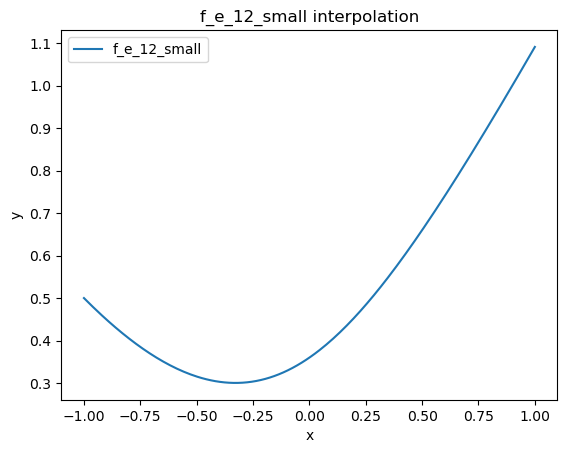

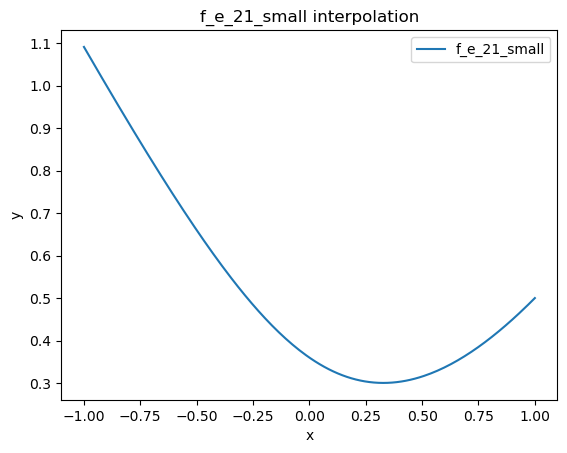

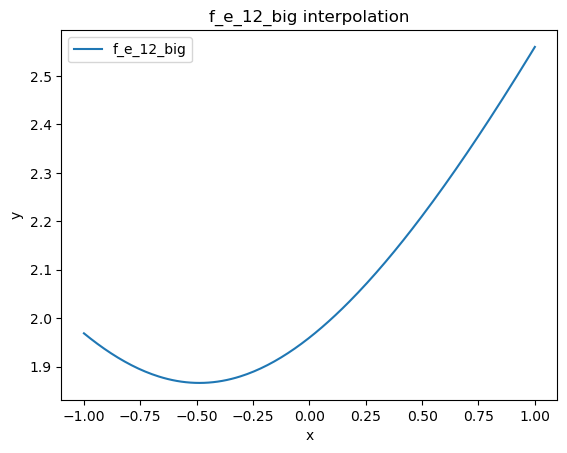

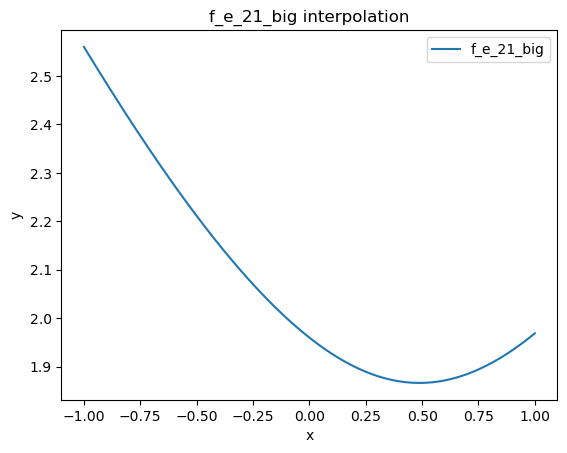

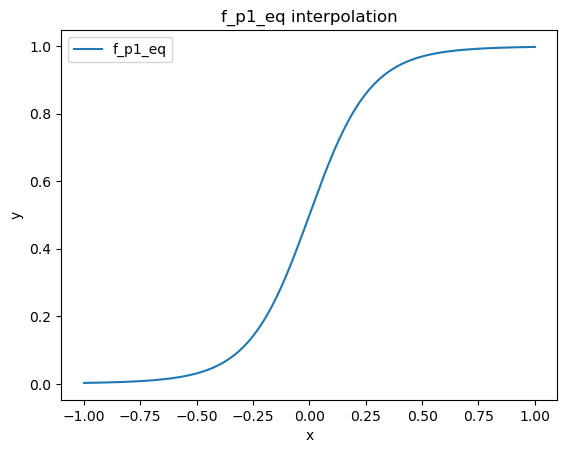

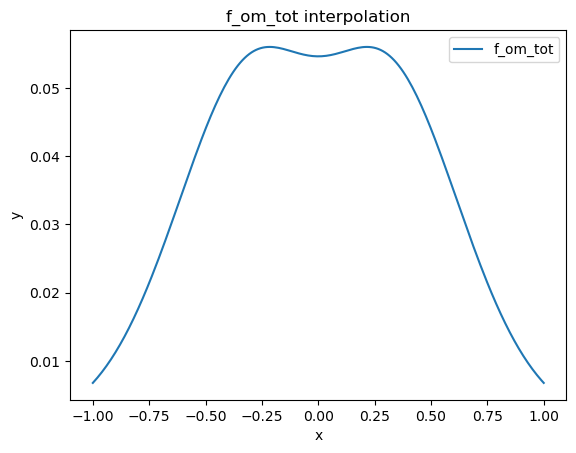

current phase: train
p1 in train & fast: 0.50459066
==================== parameters after changing p1 ====================
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: 0.00095219
phi: 45
beta_prime: 10
e_12_small: 0.3603495248395219
e_21_small: 0.3596513435558987
e_12_big: 1.9603493183427452
e_21_big: 1.959651137059122
theta_1: 23.600360036003593
theta_2: 156.45364536453644
f0: 10000000000.0
p1: 0.50459066
p2: 0.49540934000000003
k_s_lim: 1.0
compute_interpolation: True


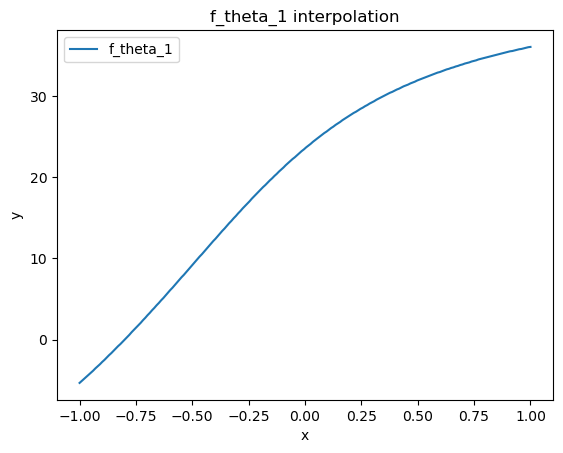

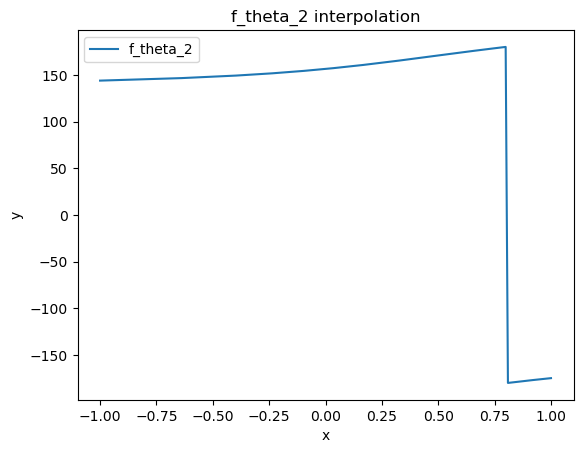

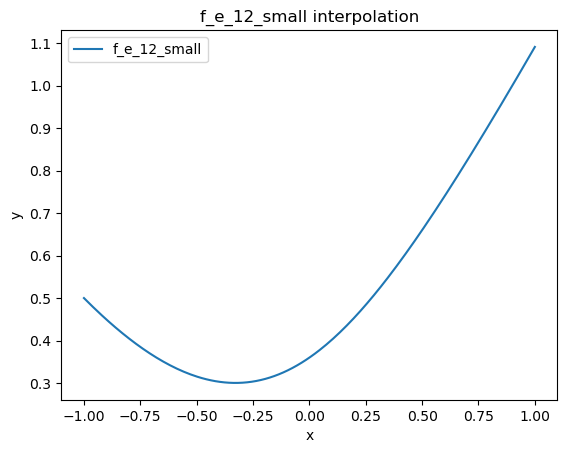

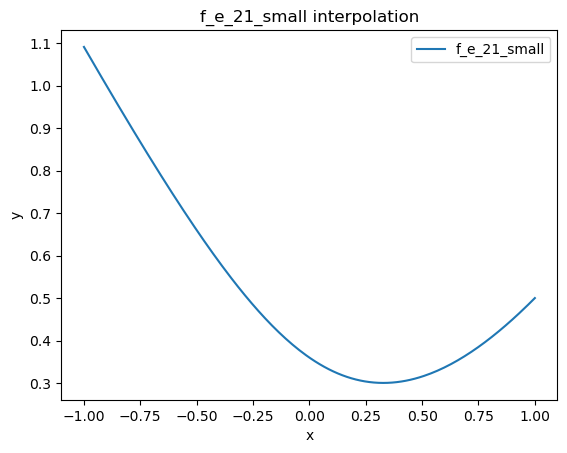

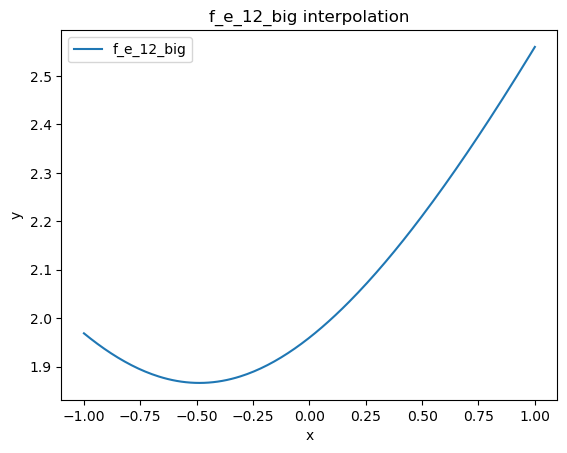

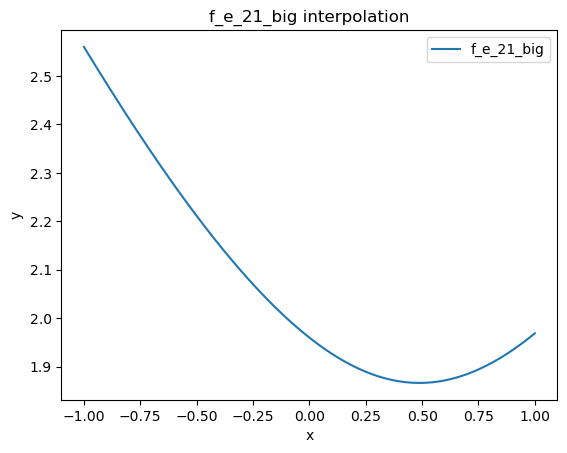

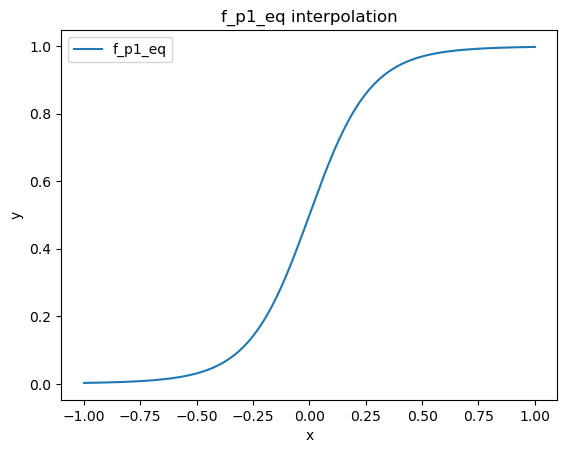

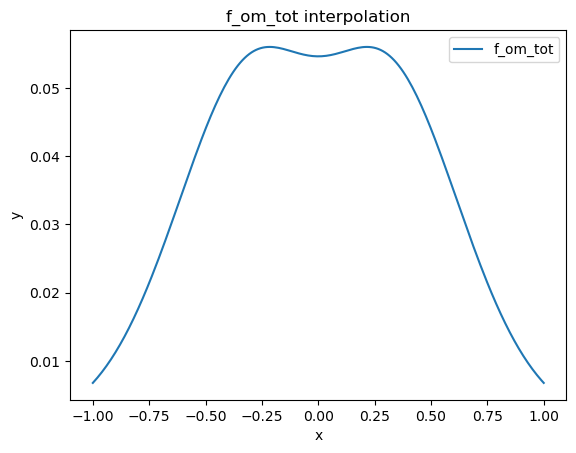

==================== parameters after changing p1 ====================
noise-free training output
skip restarting..
Seed Training: 1234
interdensity: 100
restart: False
Primep1: 0.50459066
h: 0.4
theta_H: 90
k_s: shape: (1,)
  value: [0.00162682]
phi: 45
beta_prime: 10
e_12_small: 0.3603495248395219
e_21_small: 0.3596513435558987
e_12_big: 1.9603493183427452
e_21_big: 1.959651137059122
theta_1: 23.600360036003593
theta_2: 156.45364536453644
f0: 10000000000.0
p1: shape: (1,)
  value: [0.50556854]
p2: shape: (1,)
  value: [0.49443146]
k_s_lim: 1.0
compute_interpolation: True


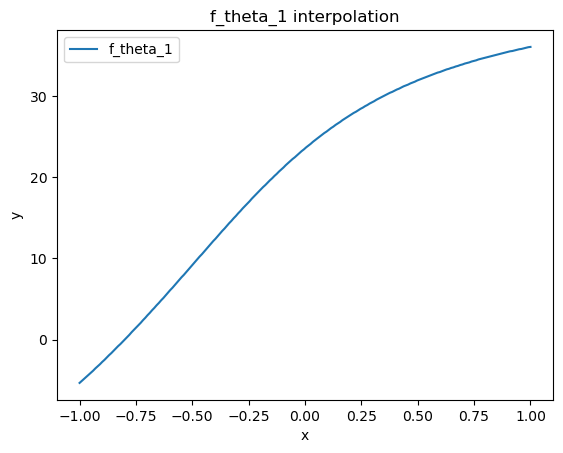

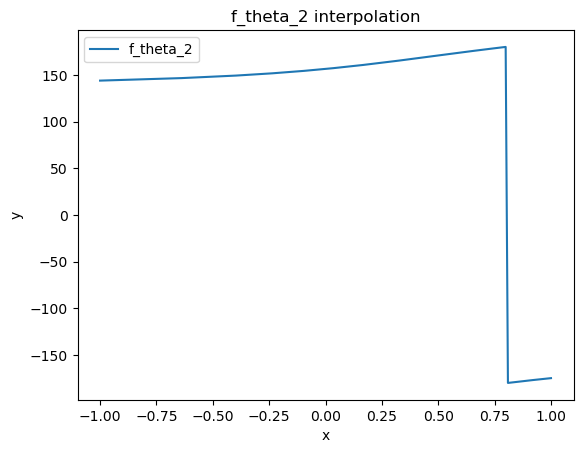

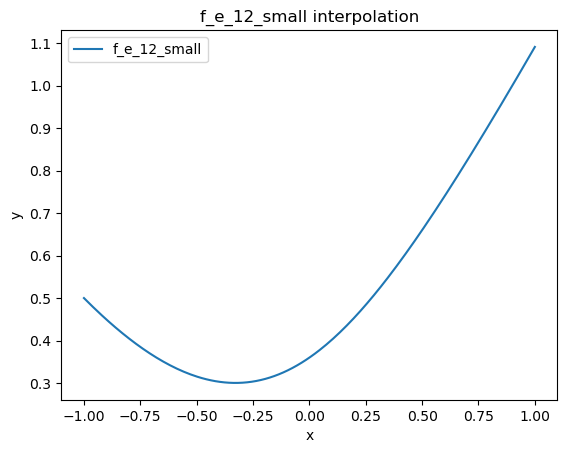

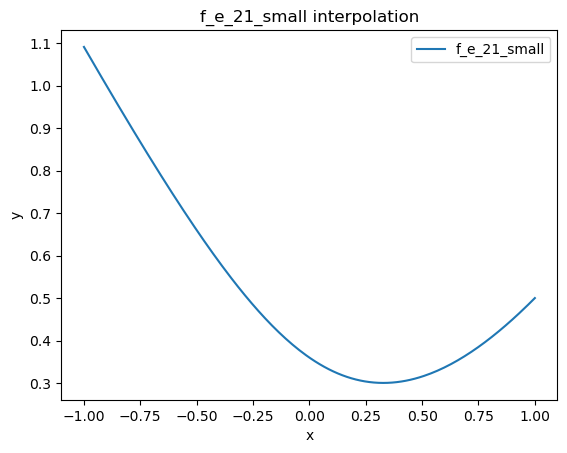

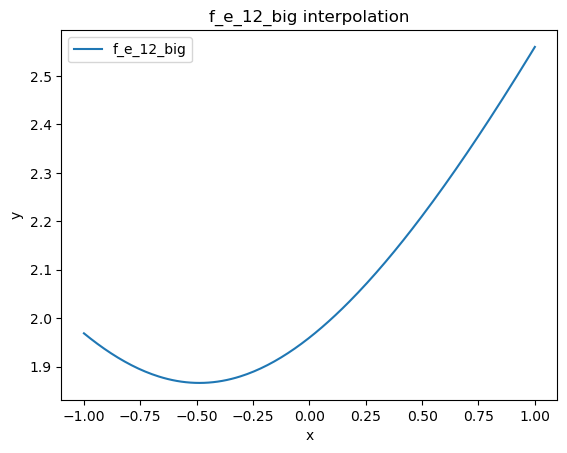

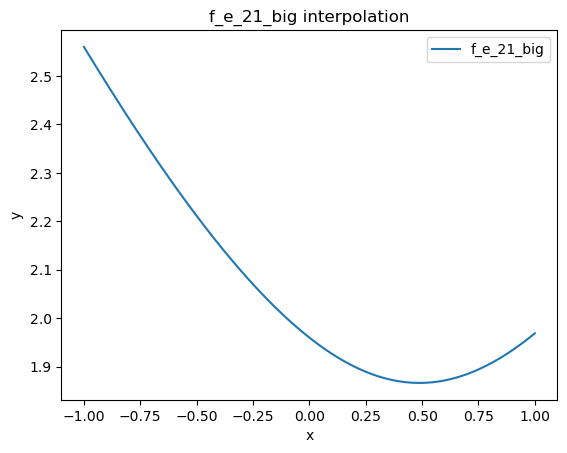

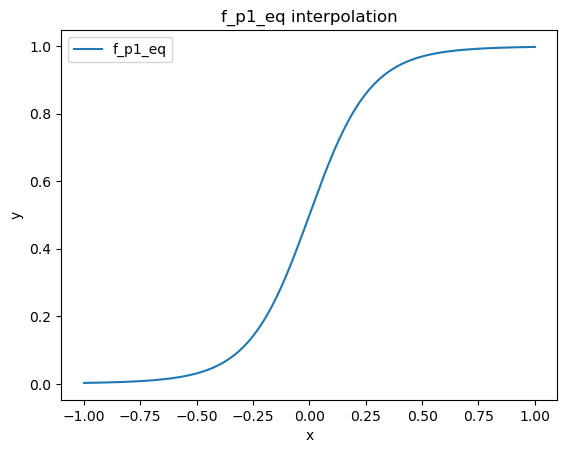

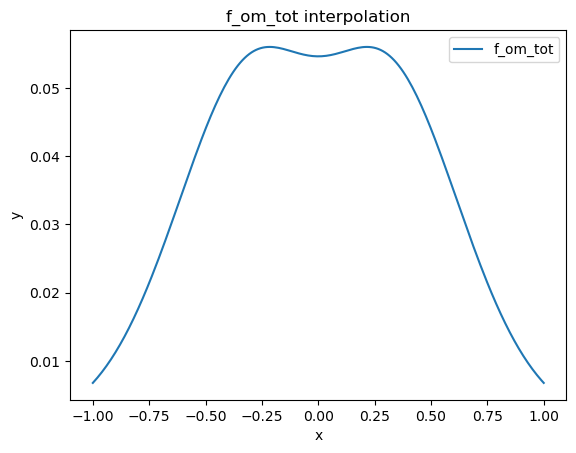

current phase: test
p1 in test & fast: [0.50556854]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004327424875924279 0.5944231621433865


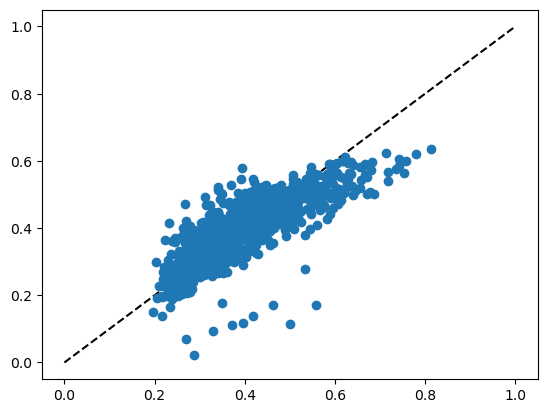

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn3 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=0.50459066)

transform3 = spn3.gen_signal_fast_delayed_feedback

# run
(y_test_3,y_pred_3) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform3,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)